# SVM from scratch

* A support vector is a feature set (a set of datapoints) which when moved, changes the separating hyperplane. The support vectors are the solutions to the equation - 
$$ y_i(\overline{X_i}.\overline{W} + b) - 1 = 0 $$ 
where $\overline{W}$ is the vector perpendicular to the separating hyperplane, $b$ is the bias and $y_i$ is the class type that has value $+1$ for + class and $-1$ for - class.

Let $\overline{X_+}$ and $\overline{X_-}$ be the support vectors corresponding to + and - classes respectively. 

The width between the support vectors is given by, 
\begin{aligned} 
    \text{Width} &= (\overline{X_+} - \overline{X_-}) . \frac{\overline{W}}{\|{\overline{W}}\|} \\
        &= \frac{2}{\| \overline{W} \|}
\end{aligned}

* The goal is to maximize the width, which is the same as minimizing $\| \overline{W} \|$, which can be reformulated as minimizing $\frac{\| \overline{W} \| ^ 2}{2} $, for the sake of convenience.

* The problem is 
\begin{aligned}
    min \frac{\| \overline{W} \| ^ 2}{2} \\
    \text{subject to} \\
    y_i(\overline{X_i}.\overline{W} + b) - 1 &= 0 
\end{aligned}

* This is an optimization problem, which can be solved using Lagrangian multipliers.

**Disadvantages:** Very math-intensive to understand and train. Need all the data in-memory to train the model. 



In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style

%matplotlib inline
style.use('ggplot')

In [25]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1 : 'r', -1 : 'b'}
        if(self.visualization):
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)

    # training using a primitive algorithm
    def fit(self, data):
        self.data = data
        # {key : value} -> {||w|| : [w, b]}
        opt_dict = {}

        # all sign possibilities for a particular value of ||w||
        transforms = [[1, 1],
                        [-1, 1],
                        [-1, -1],
                        [1, -1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                        self.max_feature_value * 0.01,
                        # point of expense:
                        self.max_feature_value * 0.001,]

        # extremely expensive
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1 * (self.max_feature_value * b_range_multiple),
                                    self.max_feature_value * b_range_multiple, 
                                    step * b_multiple):
                    for transformation in transforms:
                        w_t = transformation * w 
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w + b) >= 1
                        for yi in self.data:
                            for xi in self.data[yi]:
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    break

                            if not found_option:
                                break 
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w, self.b = opt_choice
            latest_optimum = opt_choice[0][0] + step * 2


    def predict(self, features):
        cluster = np.sign(np.dot(np.array(features), self.w) + self.b)
        if cluster != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', color=self.colors[cluster])
        
        return cluster

    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in self.data[i]] for i in self.data]
    
        # Seek y-coordinate for the given x-coordinate and v value from v = x.w + b
        # Positive class v = +1, Negative class v = -1, Decision boundary v = 0
        def hyperplane(x_coordinate, w, b, v):
            return (-w[0] * x_coordinate - b + v) / w[1]

        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x + b) = 1
        # Positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

        # (w.x + b) = -1
        # Negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

        # (w.x + b) = 0
        # Decision boundary hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

        plt.show()


In [26]:
data_dict = {-1 : np.array([[1, 7],
                            [2, 8],
                            [3, 8],]),
                    
            1 : np.array([[5, 1],
                        [6, -1],
                        [7, 3],])}

Optimized a step.
Optimized a step.
Optimized a step.


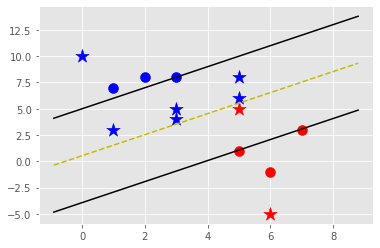

In [27]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0, 10], [1, 3], [3, 4], [3, 5], [5, 5], [5, 6], [6, -5], [5, 8],]
for p in predict_us:
    svm.predict(p)
    
svm.visualize()

## Kernels

If the given dataset doesn't have a linear separating hyperplane, a kernel is used to augment the data such that the data becomes linearly separable.

* Kernel is a similarity function which takes two inputs and outputs their similarity.

* Unknown dimension space is called the Z-space. The existing feature space is called X-space. 

* $ K(X, X') = Z.Z' $, 
where $Z = function(X)$, $ Z' = function(X') $

* Kernel is denoted using $\phi$.
* If we want to map the vector $\overline{X} : [X_1, X_2]$ to a $2^{nd}$ order polynomial vector space, then Z-space coordinates will be $[1, X_1, X_2, {X_1}^2, {X_2}^2, {X_1}{X_2}]$. We get, 

\begin{aligned}
K(X, X') &= Z.Z' \\
        &= 1 + {X_1}{X'_1} + {X_2}{X'_2} + {X_1^2}{{X'_1}^2} + {X_2^2}{{X'_2}^2} + {X_1}{X'_1}{X_2}{X'_2} \\
\end{aligned}

* In general, if we want to map $X$ space to a $ p^{th}$ order polynomial space, we get-

\begin{aligned}
K(X, X') &= (1 + X.X')^p
\end{aligned}

* Taking the mapping to a plausibly infinite no. of dimensions, 
\begin{aligned}
K(X, X') &= e^{- \gamma \|X - X'\|^2}
\end{aligned}
This is called the radial-basis kernel function (RBF, the default kernel function of `sklearn`).



## Soft-margin SVM classifier
So, far we have looked at hard-margin classifiers where misclassifications were prohibited. This might lead to *overfitting*. But, in soft-margin classifier some degree of misclassification is tolerated. This slack of error is denoted using $\zeta (\geq 0)$.

The condition for classification is now,
$$ y_i (\overline{W}.\overline{X}_i + b) \geq 1 - \zeta $$

Sum of slacks $ = \sum_i{\zeta_i} $ 

The goal is to minimize the slack of error as much as possible. 

So, the optimization problem becomes,

\begin{aligned}
    \min \frac{\| \overline{W} \| ^ 2}{2} + C \sum_i{\zeta_i} \\
    \text{subject to} \\
    y_i(\overline{X_i}.\overline{W} + b) - 1 &= 0 
\end{aligned}

$C$ is the penalty parameter of the error term. In `sklearn`, default value of $C$ is 1.

Two types of classification: OVR (one v/s rest) and OVO (one v/s one)
OVR is the default classification method. OVO is more complicated because we have to compute and decide the class using each hyperplane separating every pair of classes.